to do:

8. Update all paths

9. Add to repo and upload to pip



# Notebook of examples for using the drgpom package

The purpose of this notebook is to show how to load, output, and visualise results from simulations run using the drgpom package for simulating populations of human dorsal root ganglion neuron models.

This notebook is part of the extra material for the article "Changes in human dorsal root ganglion neuron excitability from modulating Nav 1.8 conductance are non-linear and depend on the conductances of the delayed rectifier and M-type potassium currents: a simulation study" by Britton and Rodriguez (2020). 

In [1]:
%matplotlib inline 

# Load the drgpom package
import drgpom as drg

# Load additional libraries
import os
import sys

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.4)

# Load the drgpom package
import drgpom as drg

Loading nrnmech.dll from D:\Programming\Anaconda3\lib\site-packages\drgpom\models.
Ion channel models are loaded.


# Contents

[1. Loading and saving populations and running simulations](#1)

[2. Visualising conductances of a population of models](#2)

[3. Visualising and summarising simulation results](#3)

[4. Plotting currentscapes](#4)

[5. Visualising mean firing rate across multiple simulations](#5)



 # 1. Loading and saving populations and running simulations <a id='1'></a>

## Loading a population

Use the drg.load function to load a saved population.

In [75]:
drg.data_path

'D:\\Programming\\Anaconda3\\lib\\site-packages\\drgpom\\examples\\data'

In [78]:
# Load the example population
path = os.path.join(drg.data_path, 'example_population.pkl')
pop = drg.load(path)

# View the parameters and biomarkers of the first 5 models
pop.results.head(5)

Parameters                                                               \
          GNav17    GNav18    GNav19      GKdr        GKA       GKM        GH   
Model                                                                           
1       0.067610  1.663190  1.851730  3.444879  13.449961  3.166622  1.935506   
2       0.093867  1.914979  1.143702  3.757548   1.433731  2.842375  0.530007   
3       0.134247  1.060926  2.074142  2.654127   3.037537  2.851567  1.333806   
4       0.198036  0.814600  1.619752  1.366257   7.657379  3.922353  1.685269   
5       0.378188  0.582790  0.790357  1.248439   2.180009  1.409434  1.766030   

                       ramp                                            \
         GKleak APFullWidth   APPeak APRiseTime APSlopeMin APSlopeMax   
Model                                                                   
1      0.177864         7.9  38.4758       1.35   -78.8427     173.51   
2      0.175101         8.7  42.6346        1.3   -75.9633    207.666   
3      0.028538         6.2  27.6304       1.35   -71.2639    114.114   
4      0.161021       7.425  25.6897      1.625    -49.603    85.6666   
5      0.098938       11.35  31.5024        1.7   -45.5549    98.7717   

                                                                              \
        AHPAmp   AHPTau AHPTrough   ISI      RMP Rheobase     Firing pattern   
Model                                                                          
1     -50.4164  62.6042  -79.6689   NaN  -59.359      4.6  [single, delayed]   
2      -50.001  52.7746  -80.3478   NaN -65.2656        4  [single, delayed]   
3     -52.8554  4175.51  -79.8772   NaN -57.3792      4.6  [single, delayed]   
4       -35.75  34.4756  -61.4346  32.9 -51.3049        6   [multi, delayed]   
5      -50.568  85.1034  -77.7618   NaN -56.6306      2.3  [single, delayed]   

                                          step                                 \
      APHalfWidth Threshold numAPs APFullWidth   APPeak APRiseTime APSlopeMin   
Model                                                                           
1             4.1  -29.2525      1        8.45  53.8509        4.6   -73.9346   
2             3.4  -30.3468      1        10.1  56.2715        9.5   -69.3523   
3             2.7  -27.0218      1        8.85  50.8331        5.6   -56.5653   
4           3.025  -25.6846      2         7.9  53.1218       6.55   -54.9991   
5             4.2  -27.1938      1        9.55  51.9677       2.05   -36.3186   

                                                                     \
      APSlopeMax   AHPAmp   AHPTau AHPTrough  ISI      RMP Rheobase   
Model                                                                 
1        299.267 -15.9506  29.5978  -75.6929  NaN -59.2269      0.5   
2         325.84 -7.46338  16.3064  -76.7931  NaN -65.2935      0.3   
3        246.687 -16.7824  8.81882  -74.0254  NaN -57.0151      0.3   
4         233.76  -14.557  37.0622  -74.2878  NaN -59.2593      0.3   
5        204.168 -28.0079    11.76  -69.4347  NaN -56.4374      0.2   

                                                   
      Firing pattern APHalfWidth Threshold numAPs  
Model                                              
1           [single]        3.35  -59.7423      1  
2           [single]         3.9  -69.3298      1  
3           [single]        3.35   -57.243      1  
4           [single]        3.15  -59.7308      1  
5           [single]         3.6  -41.4268      1

## Saving a population

Call the .save method of a population to save a population using Python's pickle format.

In [79]:
# Save population in the same directory as this notebook
path = os.path.join(drg.data_path, 'example_population.pkl')
pop = drg.load(path)
pop.save('example_population.pkl')

In [82]:
# You can also os.path.join() to build a path to save in a different directory
path = os.path.join('results', 'example_population.pkl')
pop.save(path)

## Running a simulation

Simulation scripts can be run from the command line by typing "python script_name_here.py cores=n" where n is the number of CPU cores you want to use for the simulation. You can also simply use "python script_name_here.py" to use all but one of the cores in your computer.

Alternatively, you can run a simulation from this notebook using the %run command as shown below:

In [ ]:
%run example_simulation.py cores=3

# 2. Visualising conductance values of a population of models <a id='2'></a>

## Visualising the conductances of models in the population

<Figure size 864x864 with 0 Axes>

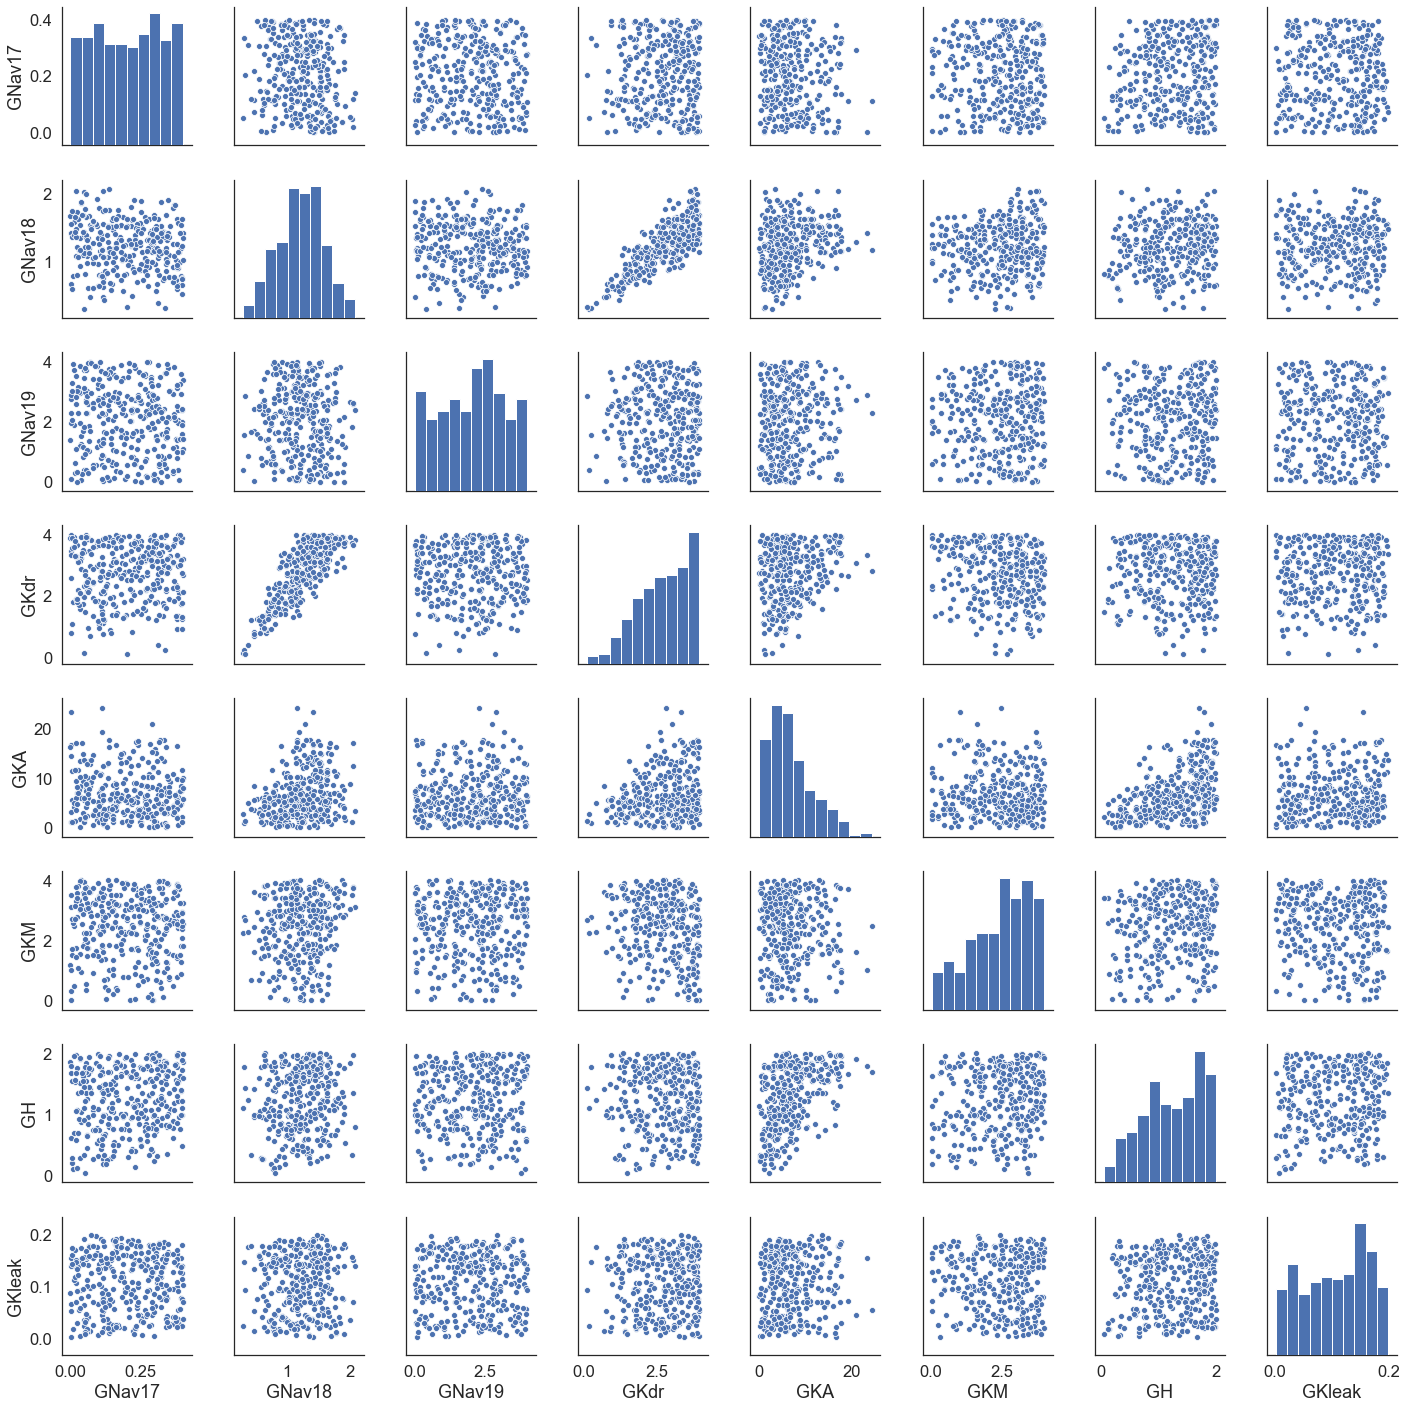

In [85]:
path = os.path.join(drg.data_path, 'example_population.pkl')
pop = drg.load(path)

plt.figure(figsize=(12,12))
fig = sns.pairplot(pop.results['Parameters'])

# 3. Summarising and visualising simulation results <a id='3'></a>

## Displaying the results of a simulation as a table

To view the biomarker results of a simulation, load the population and look at the results dataframe as shown below:

To view the voltage traces of the results, if these have been saved they will be in the directory you ran the simulation and you can view them with any image viewing software. 

In [86]:
path = os.path.join(drg.data_path, 'example_population.pkl')
pop = drg.load(path)
pop.results

Parameters                                                               \
          GNav17    GNav18    GNav19      GKdr        GKA       GKM        GH   
Model                                                                           
1       0.067610  1.663190  1.851730  3.444879  13.449961  3.166622  1.935506   
2       0.093867  1.914979  1.143702  3.757548   1.433731  2.842375  0.530007   
3       0.134247  1.060926  2.074142  2.654127   3.037537  2.851567  1.333806   
4       0.198036  0.814600  1.619752  1.366257   7.657379  3.922353  1.685269   
5       0.378188  0.582790  0.790357  1.248439   2.180009  1.409434  1.766030   
...          ...       ...       ...       ...        ...       ...       ...   
324     0.123712  1.759346  3.605935  3.864295   1.653770  2.794758  1.487530   
325     0.062908  1.210011  0.291636  2.129158   6.815190  3.083375  0.842071   
326     0.127462  0.967743  1.609984  2.331717   2.619490  0.055786  0.185079   
327     0.131944  1.504748  0.732823  2.720924  13.000675  3.995942  1.918738   
328     0.251622  1.424808  0.496136  3.084588   0.476376  3.567945  1.020359   

                       ramp                                            \
         GKleak APFullWidth   APPeak APRiseTime APSlopeMin APSlopeMax   
Model                                                                   
1      0.177864         7.9  38.4758       1.35   -78.8427     173.51   
2      0.175101         8.7  42.6346        1.3   -75.9633    207.666   
3      0.028538         6.2  27.6304       1.35   -71.2639    114.114   
4      0.161021       7.425  25.6897      1.625    -49.603    85.6666   
5      0.098938       11.35  31.5024        1.7   -45.5549    98.7717   
...         ...         ...      ...        ...        ...        ...   
324    0.060677        8.25  40.3505       1.35    -76.119    192.889   
325    0.081748       11.75   38.568       1.45   -71.4564    155.995   
326    0.155761       12.85  39.7615       1.45   -27.8097     159.08   
327    0.020035        6.95  39.3432        1.4   -74.4093    172.195   
328    0.164477     9.18333   33.039    1.41667   -44.8932    138.699   

                                                             \
        AHPAmp   AHPTau AHPTrough     ISI      RMP Rheobase   
Model                                                         
1     -50.4164  62.6042  -79.6689     NaN  -59.359      4.6   
2      -50.001  52.7746  -80.3478     NaN -65.2656        4   
3     -52.8554  4175.51  -79.8772     NaN -57.3792      4.6   
4       -35.75  34.4756  -61.4346    32.9 -51.3049        6   
5      -50.568  85.1034  -77.7618     NaN -56.6306      2.3   
...        ...      ...       ...     ...      ...      ...   
324   -49.5594  128.324  -79.7845     NaN -57.9114      4.1   
325   -51.0902   401717  -79.8414     NaN -60.5829      3.8   
326   -49.4262   332992  -78.7638     NaN -70.8784      1.5   
327   -50.5112   453117  -79.8089     NaN -56.6749      4.6   
328   -31.9292  18.3581  -59.8899  36.125 -53.8799        6   

                                                             step           \
          Firing pattern APHalfWidth Threshold numAPs APFullWidth   APPeak   
Model                                                                        
1      [single, delayed]         4.1  -29.2525      1        8.45  53.8509   
2      [single, delayed]         3.4  -30.3468      1        10.1  56.2715   
3      [single, delayed]         2.7  -27.0218      1        8.85  50.8331   
4       [multi, delayed]       3.025  -25.6846      2         7.9  53.1218   
5      [single, delayed]         4.2  -27.1938      1        9.55  51.9677   
...                  ...         ...       ...    ...         ...      ...   
324    [single, delayed]         3.3  -30.2251      1       10.15   55.073   
325    [single, delayed]         4.3  -28.7512      1        8.95  54.4146   
326    [single, delayed]         4.1  -29.3376      1        8.65  54.9209   
327    [single, delayed]     

## Summary statistics for biomarkers

In [87]:
# Summarise numeric biomarkers for the step stimulus simulation
simulation_name = 'step' # can also use 'ramp'
numeric_results = pop.results[simulation_name].drop(['Firing pattern', 'ISI'], axis=1).astype(float) 
numeric_results.describe()

,APFullWidth,APPeak,APRiseTime,APSlopeMin,APSlopeMax,AHPAmp,AHPTau,AHPTrough,RMP,Rheobase,APHalfWidth,Threshold,numAPs
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.0
mean,8.774695,53.766653,4.543902,-61.289650,272.315207,-19.642481,26.424560,-75.055066,-59.619433,0.303049,3.334909,-55.412584,1.0
std,0.904187,2.088776,1.803575,10.233769,35.673990,8.593773,14.702438,1.682129,2.744667,0.081217,0.430996,8.734463,0.0
min,6.100000,50.605929,1.400000,-81.478137,142.595231,-40.292992,3.868527,-77.879251,-70.860638,0.200000,1.800000,-73.060423,1.0
25%,8.150000,52.039183,2.275000,-68.596318,253.068905,-27.482138,13.923608,-76.230513,-61.059833,0.200000,3.087500,-60.662866,1.0
50%,8.825000,53.517632,4.900000,-62.899541,275.018097,-16.700139,23.385862,-75.429257,-59.232735,0.300000,3.400000,-58.597076,1.0
75%,9.462500,55.089123,5.762500,-55.237553,297.273699,-14.246362,36.828618,-74.240019,-57.657043,0.300000,3.650000,-48.091170,1.0
max,10.500000,60.218950,9.500000,-24.830112,369.529249,-0.282268,59.745473,-68.362017,-54.611762,0.500000,4.350000,-32.298272,1.0


## Plotting traces

To output voltage trace data files from a simulation you need to set save_type in your simulation script to either 'trace' or 'both' (which will also produce image files of all traces). This will save a trace data file for each model for each simulation. This uses a lot of hard drive space so for simulations with large numbers of models we recommend just using 'fig' for save_type.

Traces can then be plotted using the approaches demonstrated below.

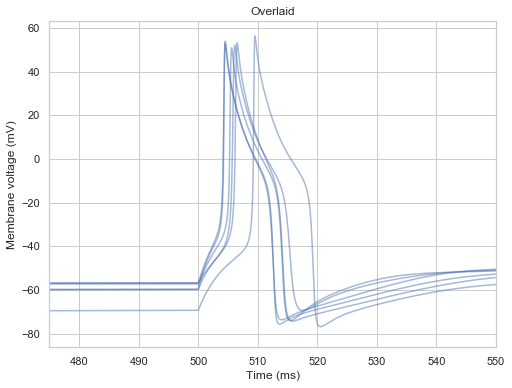

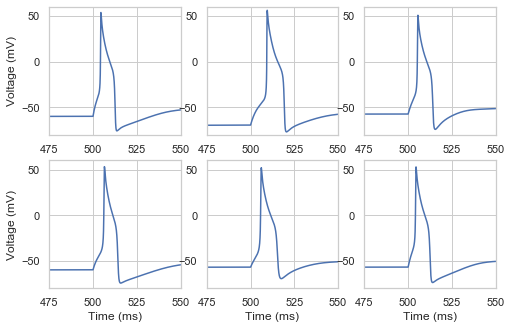

In [92]:
" Plot traces in two ways - all overlaid in one figure, and in grids with one trace per panel "

# Setup
trace_file_format = os.path.join(drg.data_path,'trace_{}.pkl') # The {} means we can insert the index of each model with the .format method below
num_traces = 6
sns.set(style="whitegrid") 

# Plotting with all traces overlaid 
fig = plt.figure(figsize=(8,6))
for i in range(1,num_traces+1):
    trace_filename = trace_file_format.format(i)
    trace = drg.load(trace_filename)
    plt.plot(trace['t'], trace['v'], 'b', alpha=0.5)
    
plt.title('Overlaid')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane voltage (mV)')
plt.xlim(475,550) # Focus the plot on the region of the simulation with the AP

# Plotting each trace separately in a grid
fig = plt.figure(figsize=(8,8))
for i in range(1,num_traces+1):
    subplot_dim = int(np.ceil(np.sqrt(num_traces))) # Automatically calculate dimensions of subplots needed for a square grid
    plt.subplot(subplot_dim,subplot_dim,i)
    trace_filename = trace_file_format.format(i)
    trace = drg.load(trace_filename)
    plt.plot(trace['t'], trace['v'])
    plt.xlim(475,550) # Focus the plot on the region of the simulation with the AP
    plt.ylim(-80,60)
    if i in [1,4]:
        plt.ylabel('Voltage (mV)')
    if i in [4,5,6]:
        plt.xlabel('Time (ms)')
    

# 4. Plotting currentscapes <a id='4'></a>

Currentscapes allow us to view the relative contribution of all ionic currents in a model in a simulation alongside the voltage trace. We can therefore see how different currents contribute to the action potential. The code below generates a currentscape for a saved simulation. To use currentscapes for your simulations you need to save the full output of all ionic currents as well as the voltage trace. To see how to do this view the example_save_all_ionic_currents.py in the examples directory (call drg.examples_path to find this directory).

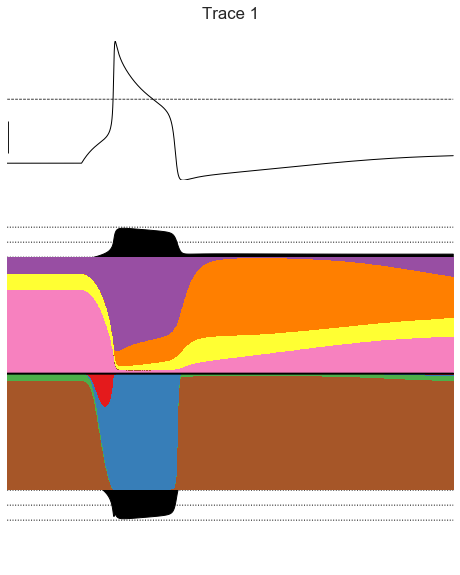

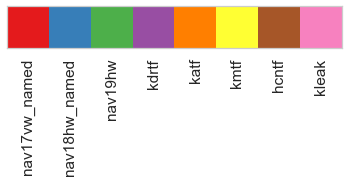

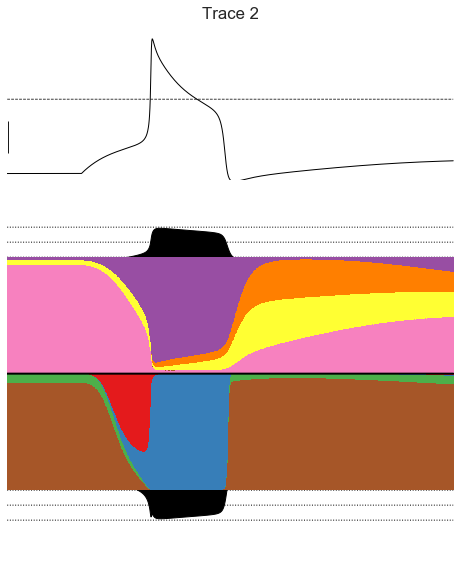

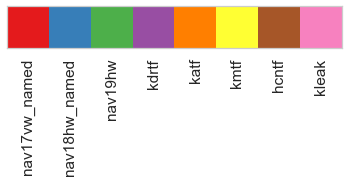

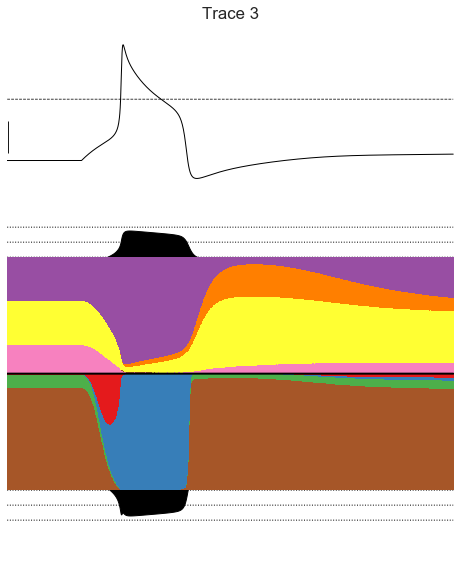

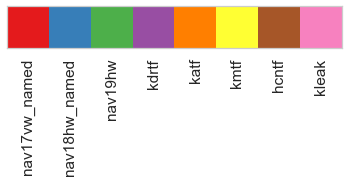

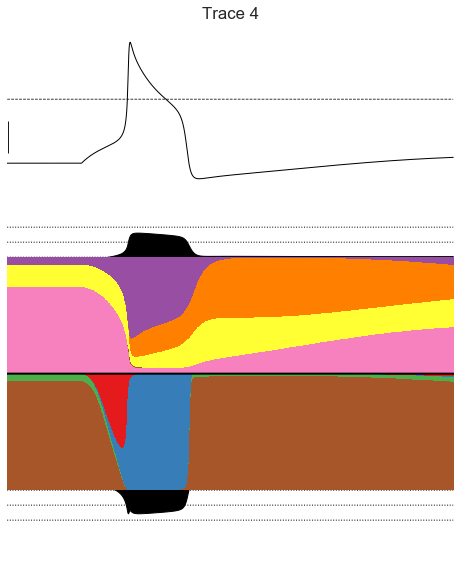

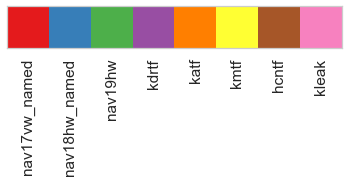

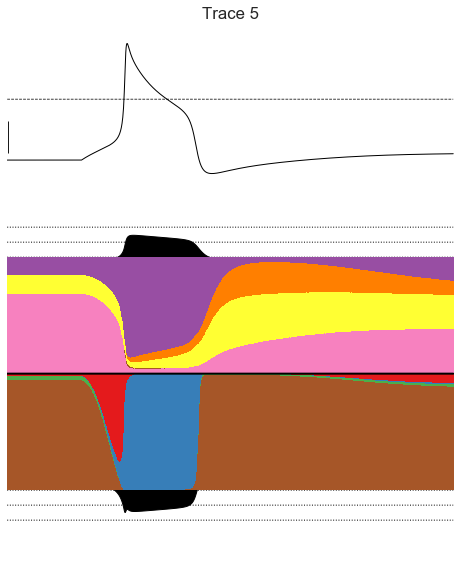

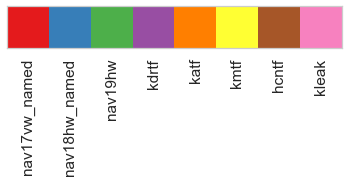

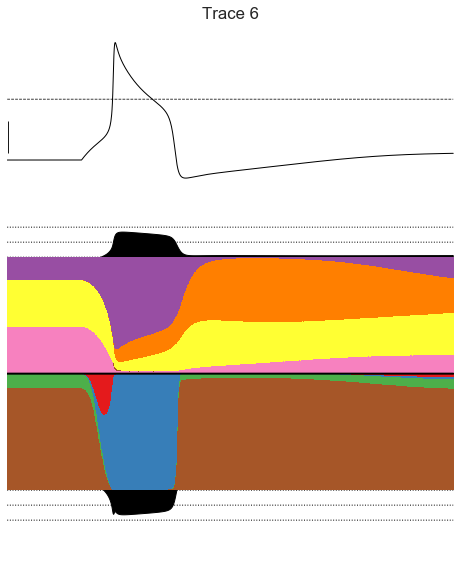

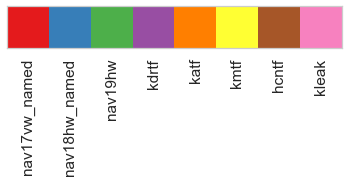

In [2]:
# Plot currentscapes of the first six models from the example_save_all_ionic_currents.py simulation.
trace_file_format = os.path.join(drg.data_path,'trace_{}.pkl') # The {} means we can insert the index of each model with the .format method below
num_traces = 6

for i in range(1,num_traces+1):
    trace = drg.load(trace_file_format.format(i))
    fig = drg.plot_currentscape(trace, figsize=(8,10), 
                                start_time=490, end_time=550, # Stimulus begins at t = 500 ms so plot around this period
                                legend=True, title=f'Trace {i}'
                               )

# 5. Visualising mean firing rate across multiple simulations <a id='5'></a>

In the paper we show summary results from a large number of simulations in which stimulus amplitude and the Nav 1.8 conductance are uniformly varied across the population of models. Here we show how to create similar plots using results from running vary_amp_and_gnav18.py in the examples directory.

In [4]:
# Run the simulation 
%run vary_amp_and_gnav18.py

ERROR:root:File `'vary_amp_and_gnav18.py'` not found.


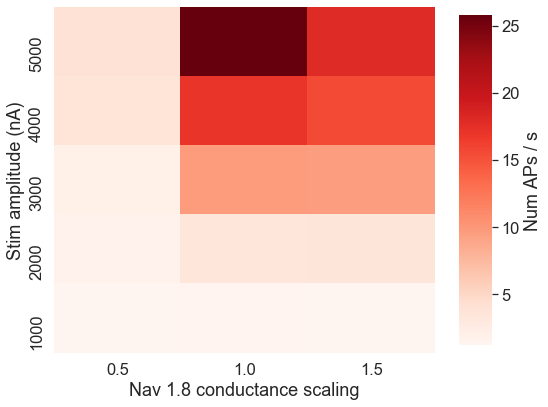

In [74]:
# Load results
pop = drg.load('F:\\CLPC48\\drg-pom\\drgpom\\examples\\vary_amp_and_gnav18.pkl')
# pop = ...

sim_protocol = 'step'


# Organise data
df = drg.make_grouped_sim_data(pop, biomarker='numAPs', agg='mean', filter_outliers=False, 
                              scaled_parameters=['GNav18'], threshold=2500)

gnav18 = np.sort(df[('Scaling factors', 'GNav18')].unique()) 
amps = np.sort(df[('Amp', sim_protocol)].unique()) 
grid = np.meshgrid(gnav18, amps)
grid[1] = np.flip(grid[1], axis=0) # Flip so that the origin is in the right place
num_aps_grid = np.zeros(grid[0].shape)

# Fill in grid for heatmap
for i in range(grid[0].shape[0]):
    for j in range(grid[0].shape[1]):
        gnav18_val = grid[0][i,j]
        amp_val = grid[1][i,j]
        row = df[  (df[('Scaling factors', 'GNav18')] == gnav18_val) 
                 & (df[('Amp', sim_protocol)] == amp_val)
                ]
        val = row[('numAPs', sim_protocol)]
        num_aps_grid[i,j] = val

num_aps_grid = num_aps_grid/0.8 # Convert from APs/800 ms to APs/s

# Plot heatmap
fig = plt.figure(figsize=(8,6))
sns.set(style="white")        
sns.set_context(context="notebook", font_scale = 1.5,)

gnav18_labels = []
for g in gnav18:
    gnav18_labels.append(g)
    #gnav18_labels.append('')

amp_labels = []

for amp in amps[::-1]:
    amp = f'{amp:.0f}'
    amp_labels.append(amp)

ax = sns.heatmap(num_aps_grid, 
             xticklabels=gnav18_labels, 
             yticklabels=amp_labels, 
             cbar_kws={'label': 'Num APs / s', 
                        'shrink': 0.95,
                        'aspect': 10,
                    },
             cmap="Reds",
                )


plt.xticks(rotation=0)
ax.set_aspect('auto')
plt.ylim(len(amp_labels),0)

plt.xlabel('Nav 1.8 conductance scaling')
plt.ylabel('Stim amplitude (nA)')
plt.tight_layout()